### Problema 7.18
Um campo de escoamento bidimensional é defi-  nido por seus componentes u = (2x2) pés/s e v = (-4xy  + x2) pés/s, onde x e y estão em pés. Determine a fun-  ção corrente e desenhe a linha de corrente que passa  pelo ponto (3 pés, 1 pé). 

Hibbeler, R. C.. Mecânica dos fluidos (p. 359). Edição do Kindle. 

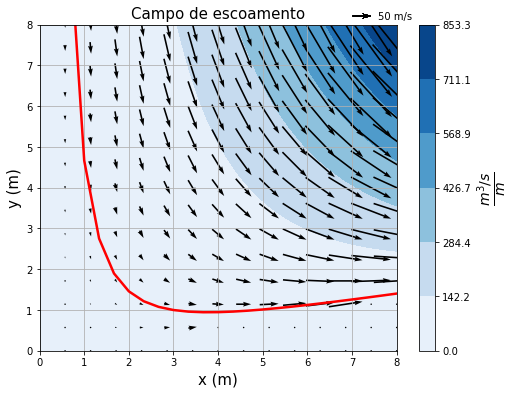

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#Domínio de coordenadas
xmin=0
xmax=8
ymin=0
ymax=8

#Função para ciação de malha
#====================================================
def malha(xmin, xmax, ymin, ymax, nx, ny):
    x = np.linspace(xmin, xmax, nx)    #Coordenadas x dos pontos da malha
    y = np.linspace(ymin, ymax, ny)    #Coordenadas y dos pontos da malha
    X, Y = np.meshgrid(x, y)           #Criação da malha
    return X, Y


def func_corr(corrente):
    for i in range(np.shape(corrente)[0]):
        for j in range(np.shape(corrente)[1]):
            if corrente[i,j]<0:
                corrente[i,j]=0
            else:
                corrente[i,j]=corrente[i,j]
    return corrente

def func_vel(vel, fcorrente):
    for i in range(np.shape(fcorrente)[0]):
        for j in range(np.shape(fcorrente)[1]):
            if fcorrente[i,j]<0:
                vel[i,j]=0
                vel[i,j]=0
            else:
                vel[i,j]=vel[i,j]
                vel[i,j]=vel[i,j]
    return vel

#Plotagem do mapa de cores da função de corrente
#====================================================
X, Y = malha(xmin, xmax, ymin, ymax, 100, 100)
corrente=func_corr(2*X**2*Y-(1/3)*X**3)       #Função de corrente

fig = plt.figure(figsize=(8, 6))   #Tamanho da figura
ax = fig.add_subplot(111)          #Apenas uma figura
im = ax.contourf(X, Y,             #Plotagem da função de corrente
    corrente, cmap='Blues', levels=np.linspace(corrente.min(), corrente.max(), 7)) 
cbar=fig.colorbar(im)              #Barra de cores
cbar.set_label(                    #Rótulo da barra de cores
    label=r'$\frac{m^{3}/s}{m}$', size=20)

#Plotagem de vetores velocidade
#====================================================
X, Y = malha(xmin, xmax, ymin, ymax, 15, 15)

U=func_vel(2*X**2 , 2*X**2*Y-(1/3)*X**3)
V=func_vel(-4*X*Y+X**2 , 2*X**2*Y-(1/3)*X**3)

VR=(U**2+V**2)**0.5
velocidade=ax.quiver(X, Y,       #Plotagem do vetor velocidade
    U, V, color='k', angles='xy', scale=1000, width=0.0045, pivot='mid')
qk=ax.quiverkey(velocidade, 0.7, 0.9, 50, label='50 m/s', labelpos='E', coordinates='figure')

#Linha de corrente
#====================================================
x=np.linspace(xmin+0.0000001, xmax, 25)
y=(x**3+27)/(6*x**2)
plt.plot(x,y, color='r', linewidth=2.5)

#Edição do gráfico
#====================================================
plt.title('Campo de escoamento', fontsize=15)
plt.xlabel('x (m)', fontsize=15)
plt.ylabel('y (m)', fontsize=15)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.grid()